In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from encoding_information.datasets import BSCCMDataset, MNISTDataset
import jax.numpy as np

2024-09-10 12:07:55.589930: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 12:07:56.212047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-09-10 12:07:56.212117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-09-10 12:07:56.212125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
# dataset = BSCCMDataset('/home/hpinkard_waller/data/BSCCM/')
dataset = MNISTDataset()

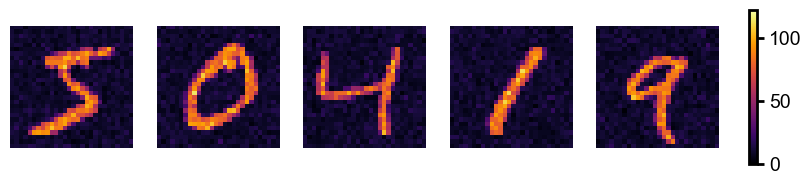

In [7]:
# plot some example images with colorbar

from cleanplots import *

measurements = dataset.get_measurements(num_measurements=100, mean=20, bias=10)

vmin, vmax = np.min(measurements), np.max(measurements)

fig, ax = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):
    im = ax[i].imshow(measurements[i].reshape(28, 28), cmap='inferno', vmin=vmin, vmax=vmax)
    ax[i].axis('off')

# show colorbar off to right side
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)